# CS2 Inferno Update

Update the inferno map to include Z coordinates as well

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from awpy import Demo
import plotly.graph_objs as go

In [3]:
nodes = pd.read_csv('../../../data/map_graph_model/de_inferno/nodes.csv')
edges = pd.read_csv('../../../data/map_graph_model/de_inferno/edges.csv')

In [5]:
files = [
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-astralis-vs-virtuspro-bo3-MPKVFectLYZpY_brKJhH1sastralis-vs-virtus-pro-m1-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-saw-bo3-ESSTYxFkvaG2Ij-q_tbYfkfaze-vs-saw-m2-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-vitality-bo3-lQLvdLlJcL7dI4fNDLSZOXfaze-vs-vitality-m1-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-saw-vs-astralis-bo3-CVFySu5vH0SDxuYWfQA4dZsaw-vs-astralis-m2-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-vitality-vs-g2-bo3-07R4CPOHu_IwXUW--CcGcfvitality-vs-g2-m1-inferno.dem',
]

pos = None

for idx, file in enumerate(files):
    if idx == 0:
        pos = Demo(file).ticks[['X', 'Y', 'Z']]
        pos.round(0)
        pos = pos.drop_duplicates()
    else:
        pos = pd.concat([pos, Demo(file).ticks[['X', 'Y', 'Z']]])
        pos.round(0)
        pos = pos.drop_duplicates()
    print(f'Processed {file}')
        

Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-astralis-vs-virtuspro-bo3-MPKVFectLYZpY_brKJhH1sastralis-vs-virtus-pro-m1-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-saw-bo3-ESSTYxFkvaG2Ij-q_tbYfkfaze-vs-saw-m2-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-vitality-bo3-lQLvdLlJcL7dI4fNDLSZOXfaze-vs-vitality-m1-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-saw-vs-astralis-bo3-CVFySu5vH0SDxuYWfQA4dZsaw-vs-astralis-m2-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-vitality-vs-g2-bo3-07R4CPOHu_IwXUW--CcGcfvitality-vs-g2-m1-inferno.dem


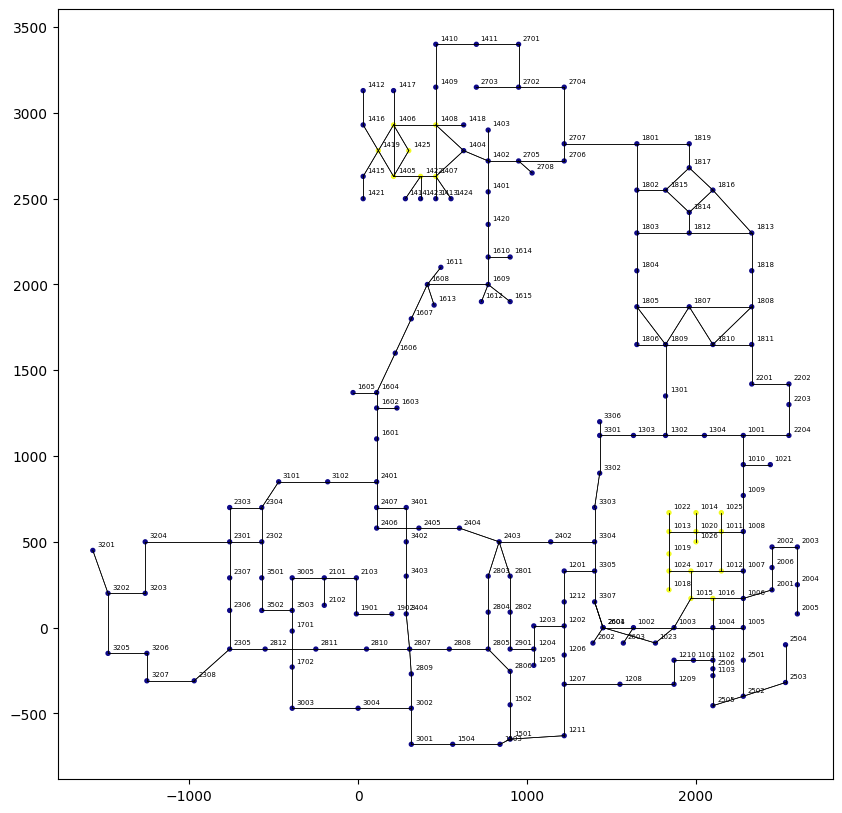

In [5]:
nodes = pd.read_csv('../../../data/map_graph_model/de_inferno/nodes.csv')
edges_by_pos_id = pd.read_csv('../../../data/map_graph_model/de_inferno/edges.csv')
# background = pos.drop_duplicates().iloc[::20]


# Create edges dataframe
nodes['node_id'] = nodes.index
edges = edges_by_pos_id.copy()

edges = edges.merge(nodes[['pos_id', 'node_id']], left_on='source_pos_id', right_on='pos_id', how='left')
edges = edges.drop(columns=['pos_id'])
edges = edges.rename(columns={'node_id': 'source'})

edges = edges.merge(nodes[['pos_id', 'node_id']], left_on='target_pos_id', right_on='pos_id', how='left')
edges = edges.drop(columns=['pos_id'])
edges = edges.rename(columns={'node_id': 'target'})

del edges['source_pos_id']
del edges['target_pos_id']

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# ax.scatter(background['X'], background['Y'], s=0.5, c=background['Z'], alpha=1)
ax.scatter(nodes['X'], nodes['Y'], s=8, c=nodes['is_bombsite'], cmap='plasma')

for edge_idx, edge in edges.iterrows():
    src = nodes[nodes['node_id'] == edge['source']]
    tgt = nodes[nodes['node_id'] == edge['target']]
    ax.plot([src['X'], tgt['X']], [src['Y'], tgt['Y']], c='black', linewidth=0.5)

for idx, row in nodes.iterrows():
    ax.annotate(str(row['pos_id']), (row['X']+25, row['Y']+25), fontsize=5)

# plt.xlim(1000, 3000)
# plt.ylim(-1000, 1000);

In [5]:
edges

,source_pos_id,target_pos_id,source,target
0,3201,3202,178,179
1,3202,3205,179,182
2,3205,3206,182,183
3,3203,3206,180,183
4,3203,3204,180,181
...,...,...,...,...
227,1608,1613,81,86
228,1610,1614,83,87
229,1609,1615,82,88
230,1011,1025,10,24


In [15]:
nodes = pd.read_csv('../../../data/map_graph_model/de_inferno/nodes.csv')
edges = pd.read_csv('../../../data/map_graph_model/de_inferno/edges_by_pos_id.csv')

# Csomópontok koordinátái
x_nodes = nodes['X']
y_nodes = nodes['Y']
z_nodes = nodes['Z']

# 3D scatter plot a csomópontoknak
scatter_nodes = go.Scatter3d(
    x=x_nodes,
    y=y_nodes,
    z=z_nodes,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)

# Az élek ábrázolása
edge_x = []
edge_y = []
edge_z = []

for _, edge in edges.iterrows():
    source_node = nodes.loc[nodes['pos_id'] == edge['source_pos_id']]
    target_node = nodes.loc[nodes['pos_id'] == edge['target_pos_id']]
    
    edge_x.extend([source_node['X'].values[0], target_node['X'].values[0], None])
    edge_y.extend([source_node['Y'].values[0], target_node['Y'].values[0], None])
    edge_z.extend([source_node['Z'].values[0], target_node['Z'].values[0], None])

edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='black', width=2)
)

# Gráf ábrázolása
fig = go.Figure(data=[scatter_nodes, edge_trace])

# Ábrázolási beállítások
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))

# Set Z axis range
fig.update_scenes(zaxis_range=[-1000, 1000])

# Gráf megjelenítése
fig.show()


## OLD

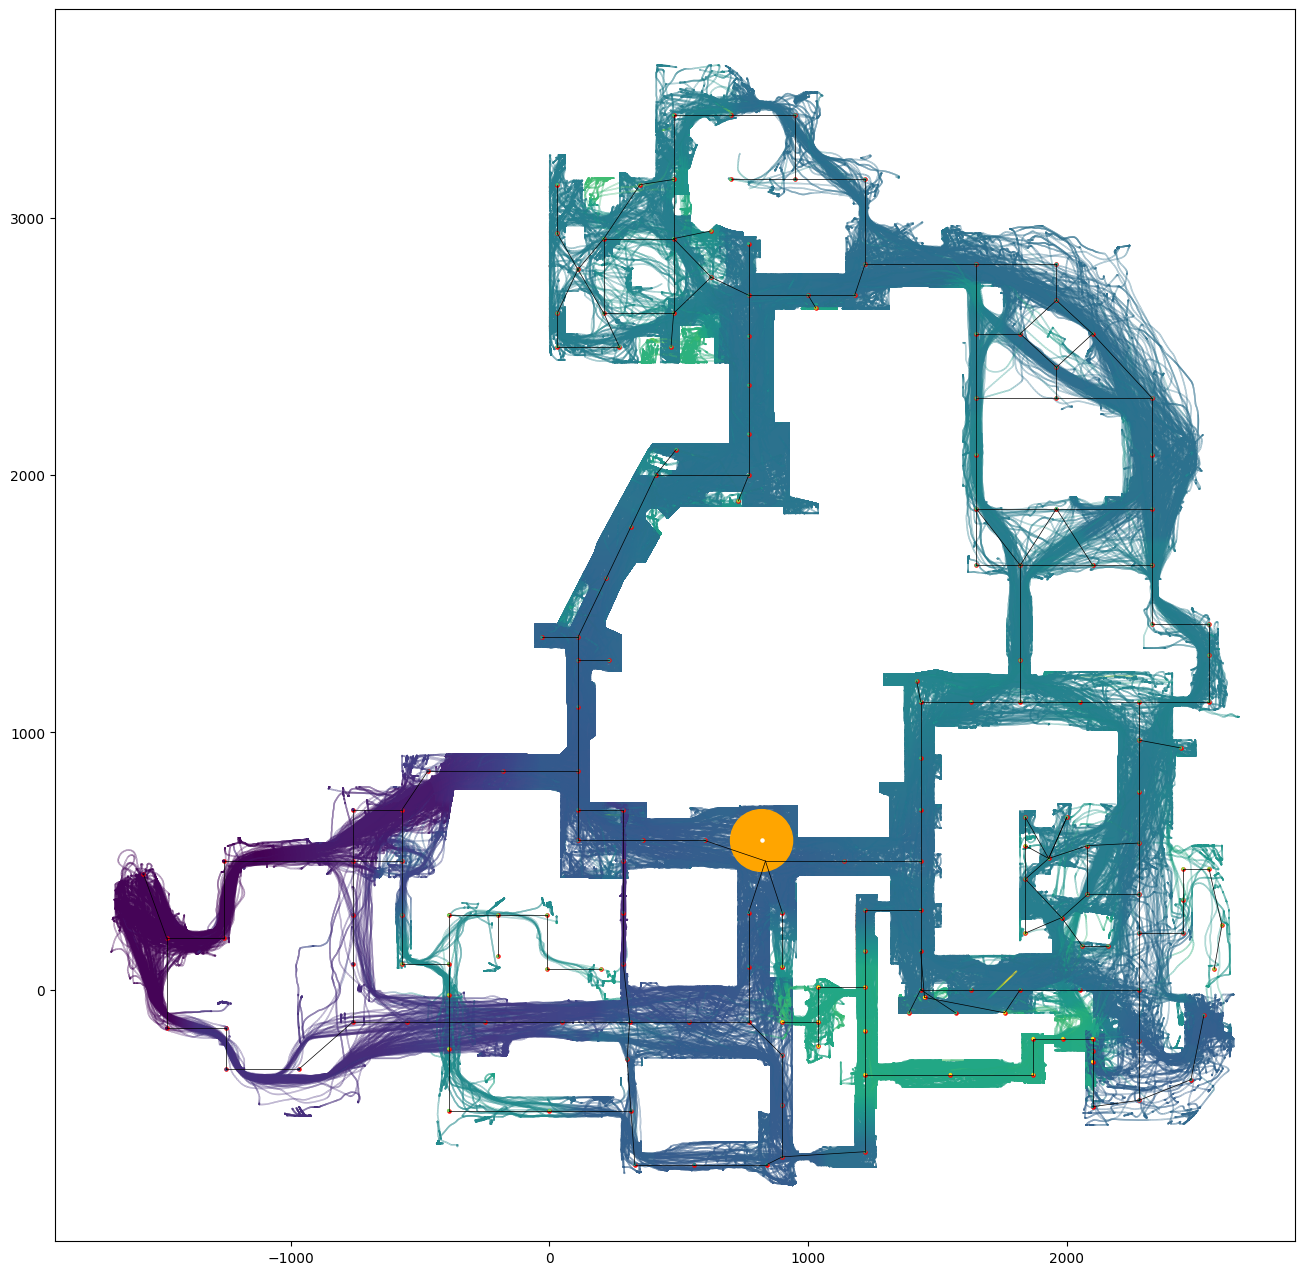

: 

In [13]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(pos.drop_duplicates()['X'], pos.drop_duplicates()['Y'], s=0.01, c=pos.drop_duplicates()['Z'])
ax.scatter(nodes['X'], nodes['Y'], s=5, c='red')
ax.scatter(nodes['X'], nodes['Y'], s=2, c=nodes['Z'])
# Add annotations to the nodes (node id)
# for idx, row in nodes.iterrows():
#     ax.annotate(str(row['node_id']) + '\n' + row['pos_name'] , (row['X']+25, row['Y']+25), fontsize=8)
for edge in edges.iterrows():
    src = nodes[nodes['node_id'] == edge[1]['source']]
    tgt = nodes[nodes['node_id'] == edge[1]['target']]
    ax.plot([src['X'], tgt['X']], [src['Y'], tgt['Y']], c='black', linewidth=0.5)

# plt.colorbar()

circle = plt.Circle((820, 580), 120, color='orange')
ax.add_patch(circle)

ax.scatter(820, 580, s=5, c='white')
# plt.scatter(820, 700, s=5, c='white')

In [30]:
nodes = pd.read_csv('../../../data/map_graph_model/de_inferno/nodes.csv')
edges = pd.read_csv('../../../data/map_graph_model/de_inferno/edges.csv')

# Csomópontok koordinátái
x_nodes = nodes['x']
y_nodes = nodes['y']
z_nodes = nodes['z'] / 10

# 3D scatter plot a csomópontoknak
scatter_nodes = go.Scatter3d(
    x=x_nodes,
    y=y_nodes,
    z=z_nodes,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)

# Az élek ábrázolása
edge_x = []
edge_y = []
edge_z = []

for _, edge in edges.iterrows():
    source_node = nodes.loc[nodes['nodeId'] == edge['source']]
    target_node = nodes.loc[nodes['nodeId'] == edge['target']]
    
    edge_x.extend([source_node['x'].values[0], target_node['x'].values[0], None])
    edge_y.extend([source_node['y'].values[0], target_node['y'].values[0], None])
    edge_z.extend([source_node['z'].values[0]/10, target_node['z'].values[0]/10, None])

edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='black', width=2)
)

# Gráf ábrázolása
fig = go.Figure(data=[scatter_nodes, edge_trace])

# Ábrázolási beállítások
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))

# Set Z axis range
fig.update_scenes(zaxis_range=[-100, 100])

# Gráf megjelenítése
fig.show()
